In [39]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re

df1 = pd.read_csv('../final_data/naver_news_scraping_ranking_0120_0831.csv')
df2 = pd.read_csv('../final_data/Time.csv')
df1
df2

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0


In [148]:
news_group['view_avg'] = df1.groupby('date').mean()

ValueError: Wrong number of items passed 2, placement implies 1

In [121]:
news_group.sort_values('view', ascending=False)

,Unnamed: 0,view
date,,
20200710,15524.5,296465.122222
20200223,3104.5,269851.222222
20200709,15434.5,267124.755556
20200225,3284.5,247792.833333
20200224,3194.5,229914.733333
...,...,...
20200122,224.5,99723.633333
20200125,494.5,96815.233333
20200124,404.5,94341.377778


In [122]:
news1 = df1[df1['date'] == 20200710]
print(news1)

       Unnamed: 0      date   section  \
15480       15480  20200710  politics   
15481       15481  20200710  politics   
15482       15482  20200710  politics   
15483       15483  20200710  politics   
15484       15484  20200710  politics   
...           ...       ...       ...   
15565       15565  20200710   Society   
15566       15566  20200710   Society   
15567       15567  20200710   Society   
15568       15568  20200710   Society   
15569       15569  20200710   Society   

                                           title    view  
15480       [단독] 박원순, 실종 당일 정세균에게 "너무 힘들다. 죄송하다"  749700  
15481          "박시장이 성추행 하고 사진을 보냈어요" 前비서 경찰에 고소  629325  
15482            [속보] 박원순 서울시장 숨진 채 발견…실종신고 7시간만  509339  
15483    "XX 자식"···이해찬, 박원순 성추행 의혹 묻자 "예의 없다" 분…  440166  
15484           이해찬 "그걸 예의라고" 박원순 빈소서 기자 노려보며 버럭  421953  
...                                          ...     ...  
15565          영국 있는 박원순 아들 상주역 맡을까…"자가격리 면제 가능"  287933  
15566            [3보] 박원순 서울시장, 북악산

In [123]:
# df2의 날짜 데이터 형식 바꿔주기
df2['re_date'] = df2.date

for i,j in zip(df2['date'],range(len(df2)+1)):
    parse = re.sub('[-=.#/?:$}]', '', i)
    df2['re_date'][j] = parse
df2

C:\Users\Hyesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1.0
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0.0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0.0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0.0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1.0
...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441.0
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371.0
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323.0
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299.0


In [135]:
df2['confirmed_day'] = 0
df2['view_avg'] = 0
df2['confirmed_day'][0] = df2['confirmed'][0]
df2['view_avg'][0] = 106879.211111

for i in range(1, len(df2)) :
    df2['confirmed_day'][i] = df2['confirmed'][i] - df2['confirmed'][i-1]
    df2['view_avg'][i] = news_group['view'][i]
    
df2

C:\Users\Hyesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hyesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Hyesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

KeyError: 1

<function matplotlib.pyplot.show(*args, **kw)>

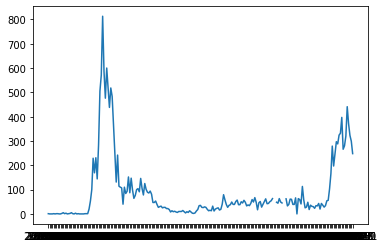

In [125]:
plt.plot(df2['re_date'], df2['confirmed_day'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

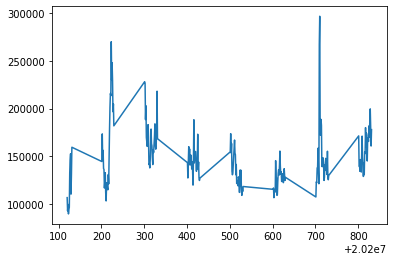

In [132]:
# news_group_pd['view']
plt.plot(news_group.index, news_group['view'])
plt.show